In [201]:
import cv2
import numpy as np
import pandas as pd
from scipy.sparse import coo_array
import matplotlib.pyplot as plt
import pandas as pd

In [202]:
def draw_line_on_grid(grid, x1, y1, x2, y2):
     
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    
    sx = 1 if x1 < x2 else -1
    sy = 1 if y1 < y2 else -1
    
    err = dx - dy
    
    while True:
         grid[y1][x1] = 255
        
        if x1 == x2 and y1 == y2:
            break
        
        e2 = 2 * err
        if e2 > -dy:
            err -= dy
            x1 += sx
        if e2 < dx:
            err += dx
            y1 += sy

In [203]:
spacia_metadata = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/SPATIAL/T2/spacia_metadata.txt',index_col=0)
spacia_metadata = spacia_metadata[spacia_metadata['spot_class']!= 'reject']
_cols = spacia_metadata['x'].to_numpy()
_rows = spacia_metadata['y'].to_numpy()
_cnt = spacia_metadata['first_type'].astype(bool).astype(int).to_numpy()
cnt = coo_array((_cnt, (_rows//50, _cols//50*1)), shape=(max(_rows//50)+1, max(_cols//50)+1))
image = (cnt.toarray() * 255).astype(np.uint8)
# plt.imshow(image, cmap='gray')
success, buffer = cv2.imencode('.png', image)
image = cv2.imdecode(buffer, cv2.IMREAD_UNCHANGED)
blurred = cv2.GaussianBlur(image, (7, 7), 0)
edge = cv2.Canny(blurred, 50, 450)  
print(edge.shape)

edge[0:125,0:233] = 0
edge[:,0:41] = 0
edge[180:243,0:233] = 0
edge[160:243,160:180] = 0
edge[148][218:233] = 255

(243, 233)


In [204]:
draw_line_on_grid(edge, 58,133,132,150)

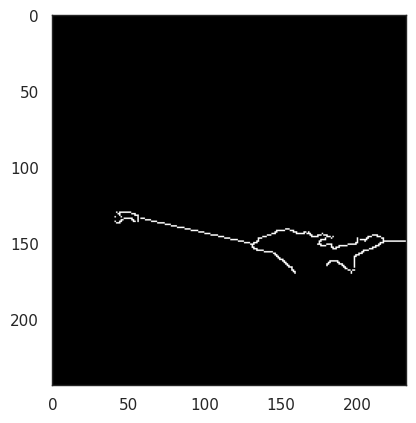

In [205]:
plt.imshow(edge, cmap='gray')

In [206]:
import numpy as np
arr = edge
coords = np.argwhere(arr != 0)

In [207]:
distances_all = []
for i in range(0,33410):
    point = np.array([int(spacia_metadata.iloc[i,5])/50,int(spacia_metadata.iloc[i,4])/50])  
    other_points = coords
    distances = np.linalg.norm(other_points - point, axis=1)
    min_distance = float(np.min(distances))
    distances_all.append(min_distance)
spacia_metadata['distances'] = distances_all
spacia_metadata['x_y'] = spacia_metadata['x'].astype('str') + '_' + spacia_metadata['y'].astype('str')

In [208]:
spacia_metadata.to_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/SPATIAL/T2/cell_distance_to_bundary.csv')

In [209]:
bin50_lineage = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/SPATIAL/T2/spatial_cell_lineag_new.csv',index_col=0)
new_lineageGrp = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/new_lineageGrp.csv',index_col=1)
bin50_lineage['lineageGrp'] = new_lineageGrp.loc[bin50_lineage['lineageGrp'],'new_lineageGrp'].to_list()
bin50_lineage

,lineageGrp,num,x,y
CellID,,,,
8400_3300,19,28,8400,3300
8850_3250,19,22,8850,3250
8800_3750,19,22,8800,3750
5850_5900,19,19,5850,5900
5850_5700,19,18,5850,5700
...,...,...,...,...
5550_2950,19,2,5550,2950
5550_3050,4,2,5550,3050
5550_3200,19,2,5550,3200


In [210]:
spacia_metadata = spacia_metadata[spacia_metadata['x_y'].isin(bin50_lineage.index)]
spacia_metadata['lineageGrp'] = bin50_lineage.loc[spacia_metadata['x_y'],'lineageGrp'].to_list()
spacia_metadata['lineageGrp'] = 'C' + spacia_metadata['lineageGrp'].astype('str')
spacia_metadata

,orig.ident,nCount_RNA,nFeature_RNA,orig.ident.1,x,y,percent.mt,nCount_SCT,nFeature_SCT,SCT_snn_res.0.8,...,min_score,singlet_score,conv_all,conv_doublet,Spp1,Fosb,Jun,distances,x_y,lineageGrp
7086696047150,lung,1148,491,sample,1650,8750,0.435540,5361,1088,12,...,661.653041,704.358651,True,True,2.302585,0.0,0.000000,40.024992,1650_8750,C3
7301444406750,lung,2462,988,sample,1700,3550,0.690496,5694,1129,3,...,1026.137086,1143.575447,True,True,3.044522,0.0,0.000000,58.549125,1700_3550,C19
7301444407050,lung,2381,965,sample,1700,3850,0.755985,5641,1124,3,...,1056.652860,1174.123047,True,True,2.397895,0.0,0.000000,52.611786,1700_3850,C1
7301444407150,lung,2141,878,sample,1700,3950,0.373657,5646,1078,3,...,973.308898,1078.013027,True,True,2.772589,0.0,0.000000,50.635956,1700_3950,C4
7301444407750,lung,2326,1052,sample,1700,4550,0.257954,5625,1224,8,...,1031.081172,1127.470241,True,True,2.944439,0.0,0.000000,38.832976,1700_4550,C4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49606872275250,lung,2810,1179,sample,11550,6450,0.747331,1629,1054,5,...,1204.661779,1532.067938,True,True,1.386294,0.0,0.000000,19.000000,11550_6450,C30
49606872275300,lung,2637,1089,sample,11550,6500,1.099735,1597,1010,5,...,1148.655111,1395.467058,True,True,1.098612,0.0,0.000000,18.000000,11550_6500,C19
49606872277600,lung,3525,1329,sample,11550,8800,0.680851,1370,778,3,...,1278.338682,1705.960532,True,True,1.098612,0.0,0.000000,28.000000,11550_8800,C4
49606872278700,lung,3118,1185,sample,11550,9900,0.513149,1621,981,1,...,1158.196984,1276.445099,True,True,1.386294,0.0,0.000000,45.276926,11550_9900,C4


In [211]:
T2_a3026_gem = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/SPATIAL/T2/lasso/T2_a3026/segmentation/B03203C612.lasso.bin50.T2_a3026.gem.gz',
           skiprows=[0, 1, 2,3,4,5,6,7],sep='\t')
T2_a3026_gem = pd.DataFrame(index=list(set(T2_a3026_gem['x'].astype('str') + '_' + T2_a3026_gem['y'].astype('str'))))
T2_a3026_gem['sample'] = 'EE_a3026'

T2_a3028_gem = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/SPATIAL/T2/lasso/T2_a3028/segmentation/B03203C612.lasso.bin50.T2_a3028.gem.gz',
           skiprows=[0, 1, 2,3,4,5,6,7],sep='\t')
T2_a3028_gem = pd.DataFrame(index=list(set(T2_a3028_gem['x'].astype('str') + '_' + T2_a3028_gem['y'].astype('str'))))
T2_a3028_gem['sample'] = 'EE_a3028'

T2_a3030_gem = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/SPATIAL/T2/lasso/T2_a3030/segmentation/B03203C612.lasso.bin50.T2_a3030.gem.gz',
           skiprows=[0, 1, 2,3,4,5,6,7],sep='\t')
T2_a3030_gem = pd.DataFrame(index=list(set(T2_a3030_gem['x'].astype('str') + '_' + T2_a3030_gem['y'].astype('str'))))
T2_a3030_gem['sample'] = 'EE_a3030'

T2_gem = pd.concat([T2_a3026_gem,T2_a3028_gem,T2_a3030_gem],axis=0)

In [212]:
spacia_metadata = spacia_metadata[spacia_metadata['x_y'].isin(T2_gem.index)]
spacia_metadata['sample'] = T2_gem.loc[spacia_metadata['x_y'],'sample'].to_list()
spacia_metadata

/tmp/ipykernel_272177/686717394.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spacia_metadata['sample'] = T2_gem.loc[spacia_metadata['x_y'],'sample'].to_list()


,orig.ident,nCount_RNA,nFeature_RNA,orig.ident.1,x,y,percent.mt,nCount_SCT,nFeature_SCT,SCT_snn_res.0.8,...,singlet_score,conv_all,conv_doublet,Spp1,Fosb,Jun,distances,x_y,lineageGrp,sample
7086696047150,lung,1148,491,sample,1650,8750,0.435540,5361,1088,12,...,704.358651,True,True,2.302585,0.0,0.000000,40.024992,1650_8750,C3,EE_a3028
7301444406750,lung,2462,988,sample,1700,3550,0.690496,5694,1129,3,...,1143.575447,True,True,3.044522,0.0,0.000000,58.549125,1700_3550,C19,EE_a3026
7301444407050,lung,2381,965,sample,1700,3850,0.755985,5641,1124,3,...,1174.123047,True,True,2.397895,0.0,0.000000,52.611786,1700_3850,C1,EE_a3026
7301444407150,lung,2141,878,sample,1700,3950,0.373657,5646,1078,3,...,1078.013027,True,True,2.772589,0.0,0.000000,50.635956,1700_3950,C4,EE_a3026
7301444411950,lung,3936,1360,sample,1700,8750,0.736789,6185,1377,12,...,1964.027951,True,True,2.995732,0.0,1.098612,39.812058,1700_8750,C3,EE_a3028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49392123914400,lung,3656,1353,sample,11500,10400,0.547046,5376,1358,1,...,1385.274726,True,True,3.091042,0.0,0.000000,51.739733,11500_10400,C48,EE_a3030
49392123915600,lung,3036,1127,sample,11500,11600,0.592885,5432,1177,1,...,1272.781120,True,True,2.944439,0.0,0.000000,71.589105,11500_11600,C48,EE_a3030
49606872273100,lung,1567,675,sample,11550,4300,0.382897,1420,675,4,...,1115.307022,True,True,0.000000,0.0,1.098612,60.728906,11550_4300,C19,EE_a3026
49606872277600,lung,3525,1329,sample,11550,8800,0.680851,1370,778,3,...,1705.960532,True,True,1.098612,0.0,0.000000,28.000000,11550_8800,C4,EE_a3030


In [213]:
new_lineageGrp = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/new_lineageGrp.csv')
new_lineageGrp['old_lineageGrp'] = 'C' + new_lineageGrp['old_lineageGrp'].astype('str')
new_lineageGrp['new_lineageGrp'] = 'C' + new_lineageGrp['new_lineageGrp'].astype('str')
new_lineageGrp.index = new_lineageGrp['old_lineageGrp']
new_lineageGrp

,new_lineageGrp,old_lineageGrp
old_lineageGrp,,
C1,C1,C1
C2,C2,C2
C3,C3,C3
C7,C4,C7
C5,C5,C5
...,...,...
C158,C171,C158
C157,C172,C157
C163,C173,C163


In [214]:
color_lineage_dict = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/color_lineage_dict.csv')
color_lineage_dict.columns = ['lineageGrp','color']
color_lineage_dict['lineageGrp'] = 'C' + color_lineage_dict['lineageGrp'].astype('str')
color_lineage_dict.loc[color_lineage_dict['lineageGrp']=='C1','color'] = '#fa9fb5'
color_lineage_dict['lineageGrp'] = new_lineageGrp.loc[color_lineage_dict['lineageGrp'],'new_lineageGrp'].to_list()
color_lineage_dict.index = color_lineage_dict['lineageGrp']
color_lineage_dict

,lineageGrp,color
lineageGrp,,
C1,C1,#fa9fb5
C5,C5,#EE00EE
C2,C2,#8B3A3A
C3,C3,#8B8B83
C6,C6,#FFF8DC
...,...,...
C172,C172,#EED8AE
C167,C167,#FF4040
C175,C175,#B0E0E6


In [215]:
custom_palette = dict(zip(color_lineage_dict['lineageGrp'], color_lineage_dict['color']))
custom_palette

{'C1': '#fa9fb5',
 'C5': '#EE00EE',
 'C2': '#8B3A3A',
 'C3': '#8B8B83',
 'C6': '#FFF8DC',
 'C4': '#9AFF9A',
 'C11': '#AB82FF',
 'C12': '#EE5C42',
 'C7': '#9400D3',
 'C8': '#8B5A00',
 'C10': '#FF6347',
 'C18': '#66CDAA',
 'C16': '#7A378B',
 'C17': '#F5F5F5',
 'C9': '#53868B',
 'C15': '#FFDEAD',
 'C25': '#8FBC8F',
 'C26': '#FF6EB4',
 'C14': '#FFFACD',
 'C20': '#8B3E2F',
 'C23': '#F0E68C',
 'C27': '#8B475D',
 'C38': '#00FFFF',
 'C13': '#00868B',
 'C29': '#EEE685',
 'C28': '#EEE9E9',
 'C43': '#D8BFD8',
 'C19': '#A4D3EE',
 'C33': '#EEEEE0',
 'C35': '#CD2626',
 'C65': '#F08080',
 'C55': '#8B0000',
 'C30': '#FF8C69',
 'C54': '#CD5C5C',
 'C45': '#FF0000',
 'C22': '#BBFFFF',
 'C21': '#458B00',
 'C34': '#D02090',
 'C40': '#FFEFD5',
 'C59': '#68838B',
 'C32': '#FF8247',
 'C81': '#8B4789',
 'C67': '#9F79EE',
 'C82': '#000080',
 'C64': '#8B2500',
 'C58': '#9B30FF',
 'C37': '#E0EEE0',
 'C84': '#CD69C9',
 'C60': '#9370DB',
 'C61': '#FFFFF0',
 'C53': '#CDB7B5',
 'C47': '#CDC8B1',
 'C94': '#548B54',
 '

In [216]:
import seaborn as sns

In [217]:
spacia_metadata

,orig.ident,nCount_RNA,nFeature_RNA,orig.ident.1,x,y,percent.mt,nCount_SCT,nFeature_SCT,SCT_snn_res.0.8,...,singlet_score,conv_all,conv_doublet,Spp1,Fosb,Jun,distances,x_y,lineageGrp,sample
7086696047150,lung,1148,491,sample,1650,8750,0.435540,5361,1088,12,...,704.358651,True,True,2.302585,0.0,0.000000,40.024992,1650_8750,C3,EE_a3028
7301444406750,lung,2462,988,sample,1700,3550,0.690496,5694,1129,3,...,1143.575447,True,True,3.044522,0.0,0.000000,58.549125,1700_3550,C19,EE_a3026
7301444407050,lung,2381,965,sample,1700,3850,0.755985,5641,1124,3,...,1174.123047,True,True,2.397895,0.0,0.000000,52.611786,1700_3850,C1,EE_a3026
7301444407150,lung,2141,878,sample,1700,3950,0.373657,5646,1078,3,...,1078.013027,True,True,2.772589,0.0,0.000000,50.635956,1700_3950,C4,EE_a3026
7301444411950,lung,3936,1360,sample,1700,8750,0.736789,6185,1377,12,...,1964.027951,True,True,2.995732,0.0,1.098612,39.812058,1700_8750,C3,EE_a3028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49392123914400,lung,3656,1353,sample,11500,10400,0.547046,5376,1358,1,...,1385.274726,True,True,3.091042,0.0,0.000000,51.739733,11500_10400,C48,EE_a3030
49392123915600,lung,3036,1127,sample,11500,11600,0.592885,5432,1177,1,...,1272.781120,True,True,2.944439,0.0,0.000000,71.589105,11500_11600,C48,EE_a3030
49606872273100,lung,1567,675,sample,11550,4300,0.382897,1420,675,4,...,1115.307022,True,True,0.000000,0.0,1.098612,60.728906,11550_4300,C19,EE_a3026
49606872277600,lung,3525,1329,sample,11550,8800,0.680851,1370,778,3,...,1705.960532,True,True,1.098612,0.0,0.000000,28.000000,11550_8800,C4,EE_a3030


In [218]:
spacia_metadata['sample_lineageGrp'] = spacia_metadata['sample'] + '_' + spacia_metadata['lineageGrp']
spacia_metadata = spacia_metadata[spacia_metadata['sample_lineageGrp']!='EE_a3026_C5'] 

/tmp/ipykernel_272177/1566787514.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spacia_metadata['sample_lineageGrp'] = spacia_metadata['sample'] + '_' + spacia_metadata['lineageGrp']


/home/liangzhen/anaconda3/envs/spateo/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/home/liangzhen/anaconda3/envs/spateo/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/home/liangzhen/anaconda3/envs/spateo/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/home/liangzhen/anaconda3/envs/spateo/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decora

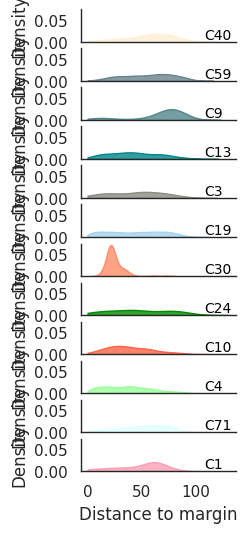

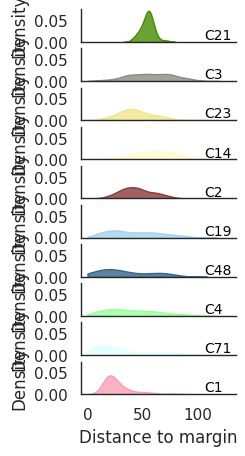

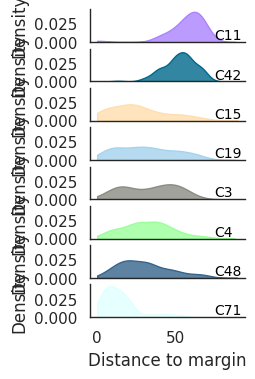

In [228]:
median_per_group = {}
median_per_group['EE_a3030'] = ['C11','C42','C15','C19','C3','C4','C48','C71']
median_per_group['EE_a3028'] = ['C21','C3','C23','C14','C2','C19','C48','C4','C71','C1']
median_per_group['EE_a3026'] = ['C40','C59','C9','C13','C3','C19','C30','C24','C10','C4','C71','C1']
for sample in ['EE_a3026','EE_a3028','EE_a3030']: 
    spacia_metadata_sample = spacia_metadata[spacia_metadata['sample']==sample]
    spacia_metadata_sample = spacia_metadata_sample[~spacia_metadata_sample['lineageGrp'].isin(list(spacia_metadata_sample['lineageGrp'].value_counts().index[spacia_metadata_sample['lineageGrp'].value_counts() < 20]))]
    spacia_metadata_sample['lineageGrp'] = pd.Categorical(spacia_metadata_sample['lineageGrp'], categories=median_per_group[sample], ordered=True)
    sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':1})
    g = sns.FacetGrid(spacia_metadata_sample, palette=custom_palette, row="lineageGrp", hue="lineageGrp", aspect=4, height=0.5)
    g.map_dataframe(sns.kdeplot, x="distances", fill=True, alpha=0.8,clip=(0, None))
    #g.map_dataframe(sns.kdeplot, x="IMDB Score", color='black')
    def label(x, color, label):
        ax = plt.gca()
        ax.text(0.8, 0.2, label, color='black', fontsize=10,
                ha="left", va="center", transform=ax.transAxes)

    g.map(label, "lineageGrp")
    #g.fig.subplots_adjust(hspace=-.5)
    g.set_titles('')
    g.set(xlabel="Distance to margin")
    plt.savefig('/syn1/liangzhen/jinhua_jilab_project/result/Figures/Figure6/'+sample +'_clone_distance_distribution.pdf')

In [120]:
spacia_metadata

,orig.ident,nCount_RNA,nFeature_RNA,orig.ident.1,x,y,percent.mt,nCount_SCT,nFeature_SCT,SCT_snn_res.0.8,...,conv_all,conv_doublet,Spp1,Fosb,Jun,distances,x_y,lineageGrp,sample,sample_lineageGrp
7086696047150,lung,1148,491,sample,1650,8750,0.435540,5361,1088,12,...,True,True,2.302585,0.0,0.000000,40.024992,1650_8750,C3,EE_a3028,EE_a3028_C3
7301444406750,lung,2462,988,sample,1700,3550,0.690496,5694,1129,3,...,True,True,3.044522,0.0,0.000000,58.549125,1700_3550,C19,EE_a3026,EE_a3026_C19
7301444407050,lung,2381,965,sample,1700,3850,0.755985,5641,1124,3,...,True,True,2.397895,0.0,0.000000,52.611786,1700_3850,C1,EE_a3026,EE_a3026_C1
7301444407150,lung,2141,878,sample,1700,3950,0.373657,5646,1078,3,...,True,True,2.772589,0.0,0.000000,50.635956,1700_3950,C4,EE_a3026,EE_a3026_C4
7301444411950,lung,3936,1360,sample,1700,8750,0.736789,6185,1377,12,...,True,True,2.995732,0.0,1.098612,39.812058,1700_8750,C3,EE_a3028,EE_a3028_C3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49392123914400,lung,3656,1353,sample,11500,10400,0.547046,5376,1358,1,...,True,True,3.091042,0.0,0.000000,51.739733,11500_10400,C48,EE_a3030,EE_a3030_C48
49392123915600,lung,3036,1127,sample,11500,11600,0.592885,5432,1177,1,...,True,True,2.944439,0.0,0.000000,71.589105,11500_11600,C48,EE_a3030,EE_a3030_C48
49606872273100,lung,1567,675,sample,11550,4300,0.382897,1420,675,4,...,True,True,0.000000,0.0,1.098612,60.728906,11550_4300,C19,EE_a3026,EE_a3026_C19
49606872277600,lung,3525,1329,sample,11550,8800,0.680851,1370,778,3,...,True,True,1.098612,0.0,0.000000,28.000000,11550_8800,C4,EE_a3030,EE_a3030_C4


In [182]:
lineageGrp_distance_to_margin = spacia_metadata.groupby('sample_lineageGrp')[['distances']].median()
lineageGrp_distance_to_margin

,distances
sample_lineageGrp,
EE_a3026_C1,56.302753
EE_a3026_C10,35.128336
EE_a3026_C11,19.811287
EE_a3026_C119,72.180330
EE_a3026_C13,41.436699
...,...
EE_a3030_C69,40.720493
EE_a3030_C70,43.167992
EE_a3030_C71,11.000000


,lineageGrp,total,state_num,prop_state,lineageGrp_label,lineageGrp_distance_to_margin
0,EE_a3028_C21,39,34,0.871795,EE_a3028_C21 (n=39),54.414277
1,EE_a3030_C11,43,36,0.837209,EE_a3030_C11 (n=43),60.207973
2,EE_a3028_C3,653,537,0.822358,EE_a3028_C3 (n=653),56.753854
3,EE_a3028_C23,119,92,0.773109,EE_a3028_C23 (n=119),41.231056
4,EE_a3028_C14,42,30,0.714286,EE_a3028_C14 (n=42),61.361755
5,EE_a3028_C19,811,577,0.711467,EE_a3028_C19 (n=811),38.897301
6,EE_a3026_C40,34,24,0.705882,EE_a3026_C40 (n=34),60.016664
7,EE_a3028_C2,154,106,0.688312,EE_a3028_C2 (n=154),43.185646
8,EE_a3026_C59,313,212,0.677316,EE_a3026_C59 (n=313),58.051701
9,EE_a3028_C48,21,14,0.666667,EE_a3028_C48 (n=21),26.925824


<Figure size 500x500 with 0 Axes>

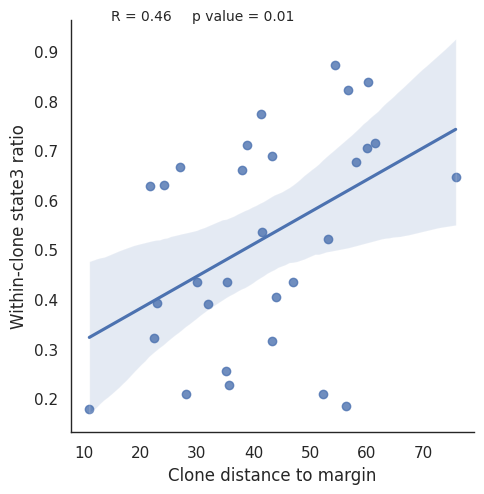

In [238]:
lineage_state3_ratio = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/SPATIAL/T2/lineage_state3_ratio.csv')
lineage_state3_ratio = lineage_state3_ratio[lineage_state3_ratio['lineageGrp']!='EE_a3026_C5']
lineage_state3_ratio['lineageGrp_distance_to_margin'] = lineageGrp_distance_to_margin.loc[lineage_state3_ratio['lineageGrp'],'distances'].to_list()
#lineage_state3_ratio
from scipy import stats
#plt.figure(figsize=(5, 5))
plt.rcParams['pdf.fonttype'] = 42
plt.gcf().set_size_inches(5, 5)

rho, p_value = stats.spearmanr(lineage_state3_ratio['lineageGrp_distance_to_margin'], lineage_state3_ratio['prop_state'])
equation = f'p value = {p_value:.2f}'
r_squared = f'R = {rho:.2f}'

sns.lmplot(lineage_state3_ratio,x='lineageGrp_distance_to_margin',y='prop_state',lowess=False,ci=95,robust=True)

plt.text(0.3, 1, equation, transform=plt.gca().transAxes, fontsize=10)
plt.text(0.1, 1, r_squared, transform=plt.gca().transAxes, fontsize=10)    
plt.xlabel('Clone distance to margin')
plt.ylabel('Within-clone state3 ratio')
#plt.xticks(fontsize=15)
#plt.yticks(fontsize=15)
plt.savefig('/syn1/liangzhen/jinhua_jilab_project/result/Figures/Figure6/within-clone_state3_ratio_VS_clone_distance_to_margin.pdf')
#plt.show

In [240]:
import pickle as pic
with open('/syn1/liangzhen/jinhua_jilab_project/result/Figures/Figure6/lineage_state3_ratio.pickle','wb') as f:
    pic.dump(lineage_state3_ratio,f)

<Figure size 500x500 with 0 Axes>

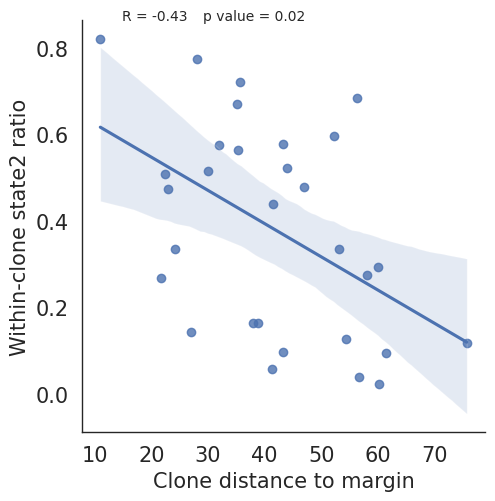

In [241]:
lineage_state2_ratio = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/SPATIAL/T2/lineage_state2_ratio.csv')
lineage_state2_ratio = lineage_state2_ratio[lineage_state2_ratio['lineageGrp']!='EE_a3026_C5']
lineage_state2_ratio['lineageGrp_distance_to_margin'] = lineageGrp_distance_to_margin.loc[lineage_state2_ratio['lineageGrp'],'distances'].to_list()
lineage_state2_ratio
from scipy import stats
plt.figure(figsize=(5, 5))
plt.rcParams['pdf.fonttype'] = 42
plt.gcf().set_size_inches(5, 5)

rho, p_value = stats.spearmanr(lineage_state2_ratio['lineageGrp_distance_to_margin'], lineage_state2_ratio['prop_state'])
equation = f'p value = {p_value:.2f}'
r_squared = f'R = {rho:.2f}'

sns.lmplot(lineage_state2_ratio,x='lineageGrp_distance_to_margin',y='prop_state',lowess=False,ci=95,robust=True)

plt.text(0.3, 1, equation, transform=plt.gca().transAxes, fontsize=10)
plt.text(0.1, 1, r_squared, transform=plt.gca().transAxes, fontsize=10)    
plt.xlabel('Clone distance to margin',fontsize=15)
plt.ylabel('Within-clone state2 ratio',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('/syn1/liangzhen/jinhua_jilab_project/result/Figures/Figure6/within-clone_state2_ratio_VS_clone_distance_to_margin.pdf')
plt.show()

In [242]:
import pickle as pic
with open('/syn1/liangzhen/jinhua_jilab_project/result/Figures/Figure6/lineage_state2_ratio.pickle','wb') as f:
    pic.dump(lineage_state2_ratio,f)

In [190]:
spacia_metadata = spacia_metadata[~spacia_metadata['lineageGrp'].isin(list(spacia_metadata['lineageGrp'].value_counts().index[spacia_metadata['lineageGrp'].value_counts() < 20]))]

In [191]:
clone_centers = spacia_metadata.groupby('sample_lineageGrp')[['x', 'y']].mean()
clone_centers['x'] = clone_centers['x'] / 50
clone_centers['y'] = clone_centers['y'] / 50
clone_centers

,x,y
sample_lineageGrp,,
EE_a3026_C1,100.659574,89.042553
EE_a3026_C10,142.822660,102.399015
EE_a3026_C11,161.000000,120.250000
EE_a3026_C13,140.875648,97.694301
EE_a3026_C14,134.700000,85.100000
...,...,...
EE_a3030_C42,187.818792,219.610738
EE_a3030_C48,203.126126,194.702703
EE_a3030_C59,196.125000,205.625000


In [192]:
clone_centers.values

array([[100.65957447,  89.04255319],
       [142.8226601 , 102.39901478],
       [161.        , 120.25      ],
       [140.87564767,  97.69430052],
       [134.7       ,  85.1       ],
       [181.39130435,  77.86956522],
       [128.61538462, 108.84615385],
       [134.99747657,  98.8239005 ],
       [103.66666667,  93.55555556],
       [176.        , 100.66666667],
       [155.0952381 ,  95.16666667],
       [129.58333333,  96.11111111],
       [217.57432432, 121.43918919],
       [110.86768802, 100.71866295],
       [109.17777778,  85.84444444],
       [125.55555556,  87.88888889],
       [134.91304348, 101.30434783],
       [ 88.77714286,  82.24571429],
       [ 67.        , 124.        ],
       [ 91.06593407,  83.87912088],
       [ 97.21666667,  70.56666667],
       [ 62.12592593, 164.17037037],
       [ 96.27272727, 196.72727273],
       [114.33333333, 197.        ],
       [ 90.53333333, 183.86666667],
       [ 85.65384615, 202.        ],
       [ 77.        , 220.        ],
 

In [193]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist, squareform

dist_array = pdist(clone_centers.values, metric='euclidean')
dist_matrix = pd.DataFrame(
    squareform(dist_array),
    index=clone_centers.index,
    columns=clone_centers.index
)

print(dist_matrix)

sample_lineageGrp  EE_a3026_C1  EE_a3026_C10  EE_a3026_C11  EE_a3026_C13  \
sample_lineageGrp                                                          
EE_a3026_C1           0.000000     44.228055     67.932847     41.136180   
EE_a3026_C10         44.228055      0.000000     25.476918      5.091679   
EE_a3026_C11         67.932847     25.476918      0.000000     30.228284   
EE_a3026_C13         41.136180      5.091679     30.228284      0.000000   
EE_a3026_C14         34.267978     19.111084     43.900028     14.026939   
...                        ...           ...           ...           ...   
EE_a3030_C42        156.986560    125.551742    102.916490    130.641787   
EE_a3030_C48        147.185126    110.256423     85.544231    115.263837   
EE_a3030_C59        150.682163    116.175486     92.318234    121.249853   
EE_a3030_C71        135.632555     94.837012     69.361544     99.559716   
EE_a3030_C9         169.453708    134.135132    109.790995    139.184026   

sample_line

In [194]:
dist_long

,sample_lineageGrp,clone2,distance,pair
EE_a3026_C10_EE_a3026_C1,EE_a3026_C10,EE_a3026_C1,44.228055,EE_a3026_C10_EE_a3026_C1
EE_a3026_C11_EE_a3026_C1,EE_a3026_C11,EE_a3026_C1,67.932847,EE_a3026_C11_EE_a3026_C1
EE_a3026_C119_EE_a3026_C1,EE_a3026_C119,EE_a3026_C1,48.037116,EE_a3026_C119_EE_a3026_C1
EE_a3026_C13_EE_a3026_C1,EE_a3026_C13,EE_a3026_C1,41.136180,EE_a3026_C13_EE_a3026_C1
EE_a3026_C14_EE_a3026_C1,EE_a3026_C14,EE_a3026_C1,34.267978,EE_a3026_C14_EE_a3026_C1
...,...,...,...,...
EE_a3030_C68_EE_a3030_C9,EE_a3030_C68,EE_a3030_C9,24.129857,EE_a3030_C68_EE_a3030_C9
EE_a3030_C69_EE_a3030_C9,EE_a3030_C69,EE_a3030_C9,12.539936,EE_a3030_C69_EE_a3030_C9
EE_a3030_C70_EE_a3030_C9,EE_a3030_C70,EE_a3030_C9,38.451268,EE_a3030_C70_EE_a3030_C9
EE_a3030_C71_EE_a3030_C9,EE_a3030_C71,EE_a3030_C9,49.036737,EE_a3030_C71_EE_a3030_C9


In [195]:
# 距离矩阵转长表
dist_long = dist_matrix.reset_index().melt(id_vars=dist_matrix.index.name, var_name='clone2', value_name='distance')
dist_long = dist_long.query("sample_lineageGrp != clone2")  # 去除对角线

dist_long['pair'] = dist_long['sample_lineageGrp'] + '_' + dist_long['clone2']
dist_long.index = dist_long['pair'].to_list()
dist_long

,sample_lineageGrp,clone2,distance,pair
EE_a3026_C10_EE_a3026_C1,EE_a3026_C10,EE_a3026_C1,44.228055,EE_a3026_C10_EE_a3026_C1
EE_a3026_C11_EE_a3026_C1,EE_a3026_C11,EE_a3026_C1,67.932847,EE_a3026_C11_EE_a3026_C1
EE_a3026_C13_EE_a3026_C1,EE_a3026_C13,EE_a3026_C1,41.136180,EE_a3026_C13_EE_a3026_C1
EE_a3026_C14_EE_a3026_C1,EE_a3026_C14,EE_a3026_C1,34.267978,EE_a3026_C14_EE_a3026_C1
EE_a3026_C142_EE_a3026_C1,EE_a3026_C142,EE_a3026_C1,81.501214,EE_a3026_C142_EE_a3026_C1
...,...,...,...,...
EE_a3030_C40_EE_a3030_C9,EE_a3030_C40,EE_a3030_C9,24.869660,EE_a3030_C40_EE_a3030_C9
EE_a3030_C42_EE_a3030_C9,EE_a3030_C42,EE_a3030_C9,22.209001,EE_a3030_C42_EE_a3030_C9
EE_a3030_C48_EE_a3030_C9,EE_a3030_C48,EE_a3030_C9,24.770174,EE_a3030_C48_EE_a3030_C9
EE_a3030_C59_EE_a3030_C9,EE_a3030_C59,EE_a3030_C9,18.928319,EE_a3030_C59_EE_a3030_C9


In [196]:
lineage_state_similarity = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/SPATIAL/T2/lineage_state_similarity.csv')
lineage_state_similarity.columns = ['clone1','clone2','between_clone_state_distance','sample1','sample2']
lineage_state_similarity['pair'] = lineage_state_similarity['clone1'] + '_' + lineage_state_similarity['clone2']
lineage_state_similarity = lineage_state_similarity[~((lineage_state_similarity['clone1']=='EE_a3026_C5')|(lineage_state_similarity['clone2']=='EE_a3026_C5'))]
lineage_state_similarity

,clone1,clone2,between_clone_state_distance,sample1,sample2,pair
0,EE_a3026_C1,EE_a3026_C10,0.013635,a3026,a3026,EE_a3026_C1_EE_a3026_C10
1,EE_a3026_C1,EE_a3026_C13,0.081675,a3026,a3026,EE_a3026_C1_EE_a3026_C13
2,EE_a3026_C10,EE_a3026_C13,0.044156,a3026,a3026,EE_a3026_C10_EE_a3026_C13
3,EE_a3026_C1,EE_a3026_C142,0.090209,a3026,a3026,EE_a3026_C1_EE_a3026_C142
4,EE_a3026_C10,EE_a3026_C142,0.068063,a3026,a3026,EE_a3026_C10_EE_a3026_C142
...,...,...,...,...,...,...
256,EE_a3030_C19,EE_a3030_C71,0.062205,a3030,a3030,EE_a3030_C19_EE_a3030_C71
257,EE_a3030_C3,EE_a3030_C71,0.039309,a3030,a3030,EE_a3030_C3_EE_a3030_C71
258,EE_a3030_C4,EE_a3030_C71,0.042300,a3030,a3030,EE_a3030_C4_EE_a3030_C71
259,EE_a3030_C42,EE_a3030_C71,0.145470,a3030,a3030,EE_a3030_C42_EE_a3030_C71


In [198]:
lineage_state_similarity = lineage_state_similarity[lineage_state_similarity['pair'].isin(dist_long.index)]
lineage_state_similarity['between_clone_distance'] = dist_long.loc[lineage_state_similarity['pair'],'distance'].to_list()
lineage_state_similarity

/tmp/ipykernel_272177/636488093.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lineage_state_similarity['between_clone_distance'] = dist_long.loc[lineage_state_similarity['pair'],'distance'].to_list()


,clone1,clone2,between_clone_state_distance,sample1,sample2,pair,between_clone_distance
0,EE_a3026_C1,EE_a3026_C10,0.013635,a3026,a3026,EE_a3026_C1_EE_a3026_C10,44.228055
1,EE_a3026_C1,EE_a3026_C13,0.081675,a3026,a3026,EE_a3026_C1_EE_a3026_C13,41.136180
2,EE_a3026_C10,EE_a3026_C13,0.044156,a3026,a3026,EE_a3026_C10_EE_a3026_C13,5.091679
3,EE_a3026_C1,EE_a3026_C142,0.090209,a3026,a3026,EE_a3026_C1_EE_a3026_C142,81.501214
4,EE_a3026_C10,EE_a3026_C142,0.068063,a3026,a3026,EE_a3026_C10_EE_a3026_C142,45.708142
...,...,...,...,...,...,...,...
256,EE_a3030_C19,EE_a3030_C71,0.062205,a3030,a3030,EE_a3030_C19_EE_a3030_C71,27.930161
257,EE_a3030_C3,EE_a3030_C71,0.039309,a3030,a3030,EE_a3030_C3_EE_a3030_C71,31.408117
258,EE_a3030_C4,EE_a3030_C71,0.042300,a3030,a3030,EE_a3030_C4_EE_a3030_C71,24.664948
259,EE_a3030_C42,EE_a3030_C71,0.145470,a3030,a3030,EE_a3030_C42_EE_a3030_C71,54.784714


(array([-0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,
         0.4 ,  0.45]),
 [Text(0, -0.05, '−0.05'),
  Text(0, 0.0, '0.00'),
  Text(0, 0.05, '0.05'),
  Text(0, 0.10000000000000002, '0.10'),
  Text(0, 0.15000000000000002, '0.15'),
  Text(0, 0.2, '0.20'),
  Text(0, 0.25000000000000006, '0.25'),
  Text(0, 0.30000000000000004, '0.30'),
  Text(0, 0.35000000000000003, '0.35'),
  Text(0, 0.4, '0.40'),
  Text(0, 0.45, '0.45')])

<Figure size 500x500 with 0 Axes>

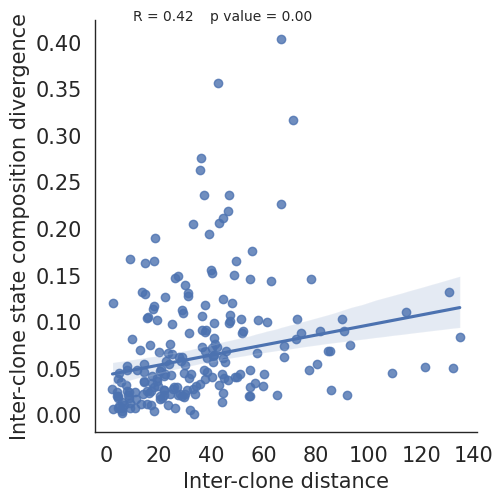

In [200]:
from scipy import stats
plt.figure(figsize=(5, 5))
plt.rcParams['pdf.fonttype'] = 42
plt.gcf().set_size_inches(5, 5)

rho, p_value = stats.spearmanr(lineage_state_similarity['between_clone_distance'], lineage_state_similarity['between_clone_state_distance'])
equation = f'p value = {p_value:.2f}'
r_squared = f'R = {rho:.2f}'

sns.lmplot(lineage_state_similarity,x='between_clone_distance',y='between_clone_state_distance',lowess=False,ci=95,robust=True)

plt.text(0.3, 1, equation, transform=plt.gca().transAxes, fontsize=10)
plt.text(0.1, 1, r_squared, transform=plt.gca().transAxes, fontsize=10)    
plt.ylabel('Inter-clone state composition divergence',fontsize=15)
plt.xlabel('Inter-clone distance',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)